C:\Users\fiore\AppData\Local\Temp\ipykernel_13624\2724222179.py:124: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\fiore\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


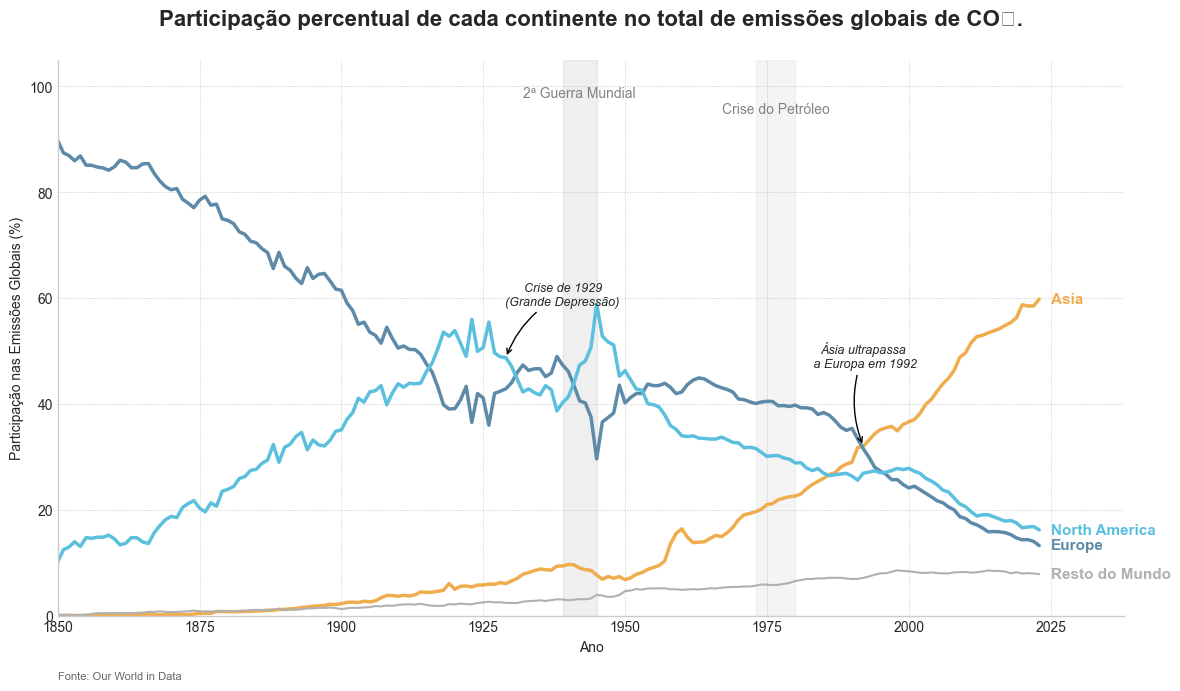

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Ler a base de dados
try:
    df_co2 = pd.read_csv("annual-share-of-co2-emissions.csv")
except FileNotFoundError:
    print("Arquivo 'annual-share-of-co2-emissions.csv' não encontrado.")
    print("Por favor, baixe o arquivo de 'Our World in Data' e coloque-o na mesma pasta do script.")
    exit()

# --- 1. PREPARAÇÃO E AGRUPAMENTO DOS DADOS ---

# Filtrar o período de análise para maior clareza
df_co2 = df_co2[df_co2['Year'] >= 1850].copy()

# Definir os continentes principais e os que serão agrupados
main_continents = ['Asia', 'Europe', 'North America']
continents_to_group = ['Africa', 'Oceania', 'South America']

# Somar os continentes com menor participação para criar 'Resto do Mundo'
df_grouped = df_co2[df_co2['Entity'].isin(continents_to_group)].copy()
df_rest_of_world = df_grouped.groupby('Year')['Share of global annual CO₂ emissions'].sum().reset_index()
df_rest_of_world['Entity'] = 'Resto do Mundo'

# Combinar os dados dos continentes principais com o novo grupo
df_final = pd.concat([
    df_co2[df_co2['Entity'].isin(main_continents)],
    df_rest_of_world
])

# --- 2. CRIAÇÃO DO GRÁFICO APRIMORADO ---

# Definir a paleta de cores e espessuras para criar hierarquia visual
color_map = {
    'Asia': '#f0ad4e',          # Laranja
    'Europe': '#5d8aa8',        # Azul escuro
    'North America': '#5bc0de', # Azul claro
    'Resto do Mundo': '#b0b0b0' # Cinza
}
linewidth_map = {
    'Asia': 2.5,
    'Europe': 2.5,
    'North America': 2.5,
    'Resto do Mundo': 1.5
}

# Iniciar a criação do gráfico
fig, ax = plt.subplots(figsize=(12, 7))

# Plotar cada linha com seu estilo correspondente
entities_to_plot = ['Asia', 'Europe', 'North America', 'Resto do Mundo']
for entity in entities_to_plot:
    entity_data = df_final[df_final['Entity'] == entity]
    ax.plot(entity_data['Year'], entity_data['Share of global annual CO₂ emissions'],
            color=color_map[entity],
            linewidth=linewidth_map[entity],
            label=entity)

# --- 3. STORYTELLING E REFINAMENTO VISUAL ---

# Título e subtítulo que contam a história
ax.set_title("Participação percentual de cada continente no total de emissões globais de CO₂.", fontsize=16, weight='bold', pad=25)

# Anotação do ponto de virada entre Ásia e Europa
df_asia = df_final[df_final['Entity'] == 'Asia']
df_europe = df_final[df_final['Entity'] == 'Europe']
# Encontrar o primeiro ano em que a Ásia ultrapassou a Europa
crossover_year = df_asia[df_asia['Share of global annual CO₂ emissions'].values > df_europe['Share of global annual CO₂ emissions'].values]['Year'].iloc[0]
crossover_value = df_asia[df_asia['Year'] == crossover_year]['Share of global annual CO₂ emissions'].iloc[0]

ax.annotate(f'Ásia ultrapassa\n a Europa em {crossover_year}',
            xy=(crossover_year, crossover_value),
            xytext=(crossover_year, crossover_value + 15),
            arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.2'),
            fontsize=9, style='italic', ha='center')
# Seta no momento em que a Ásia passa a ser o maior emissor global
# Encontrar o ano em que a Ásia supera todos os outros continentes
asia = df_final[df_final['Entity'] == 'Asia']
rest = df_final[df_final['Entity'] != 'Asia']
# Para cada ano, comparar Ásia com o maior dos outros

# Faixa colorida indicando o início da 2ª Guerra Mundial (1939)
ax.axvspan(1939, 1945, color='#b0b0b0', alpha=0.2, label='Segunda Guerra Mundial')
# Texto indicando o intervalo da 2ª Guerra Mundial
ax.text(1942, 100, '2ª Guerra Mundial', fontsize=10, color='#666666', ha='center', va='top', alpha=0.8)

# Faixa para a crise do petróleo (1973-1980)
ax.axvspan(1973, 1980, color='#b0b0b0', alpha=0.13, label='Crise do Petróleo')
ax.text(1976.5, 97, 'Crise do Petróleo', fontsize=10, color='#666666', ha='center', va='top', alpha=0.8)
# Seta para a crise americana de 1929 na América do Norte
na_1929 = df_final[(df_final['Entity'] == 'North America') & (df_final['Year'] == 1929)]
if not na_1929.empty:
    valor_1929 = na_1929['Share of global annual CO₂ emissions'].iloc[0]
    ax.annotate(
        'Crise de 1929\n(Grande Depressão)',
        xy=(1929, valor_1929),
        xytext=(1929+10, valor_1929+10),
        arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.2'),
        fontsize=9, style='italic', ha='center'
    )
# Adicionar rótulos diretos no final de cada linha (substituindo a legenda)
last_year = df_final['Year'].max()
for entity in entities_to_plot:
    last_value = df_final[(df_final['Year'] == last_year) & (df_final['Entity'] == entity)]['Share of global annual CO₂ emissions'].iloc[0]
    ax.text(last_year + 2, last_value, entity, fontsize=11, color=color_map[entity], va='center', weight='bold')

# Limpeza e formatação dos eixos
ax.set_xlabel('Ano', fontsize=10)
ax.set_ylabel('Participação nas Emissões Globais (%)', fontsize=10) # Rótulo corrigido
ax.set_xlim(1850, last_year + 15) # Espaço para os rótulos
ax.set_ylim(0, 105)

# Suavizar a grade e remover bordas desnecessárias
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adicionar fonte
ax.text(1850, -12, "Fonte: Our World in Data", fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()


Note: you may need to restart the kernel to use updated packages.


C:\Users\fiore\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


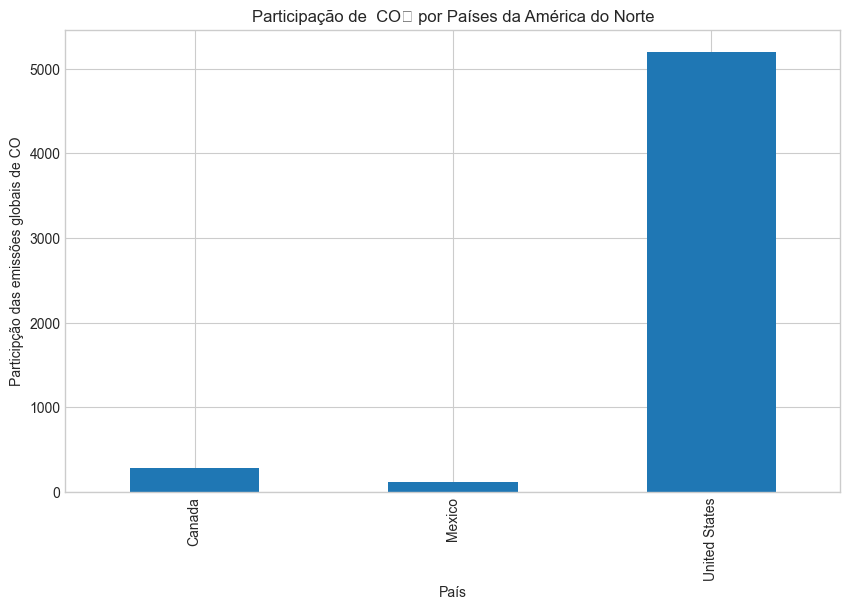

In [16]:
# Install missing packages
%pip install pandas matplotlib

import pandas as pd 
# Ler a base de dados
df_co2 = pd.read_csv("annual-share-of-co2-emissions.csv")

import matplotlib.pyplot as plt
# Filter data for South America and plot a bar chart for each country
south_america_countries = ['United States','Canada','Mexico']
south_america_data = df_co2[df_co2['Entity'].isin(south_america_countries)]

south_america_data.groupby('Entity')['Share of global annual CO₂ emissions'].sum().plot(kind='bar', figsize=(10, 6))
plt.xlabel('País')
plt.ylabel('Participção das emissões globais de CO')
plt.title('Participação de  CO₂ por Países da América do Norte')
plt.show()

Note: you may need to restart the kernel to use updated packages.


C:\Users\fiore\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


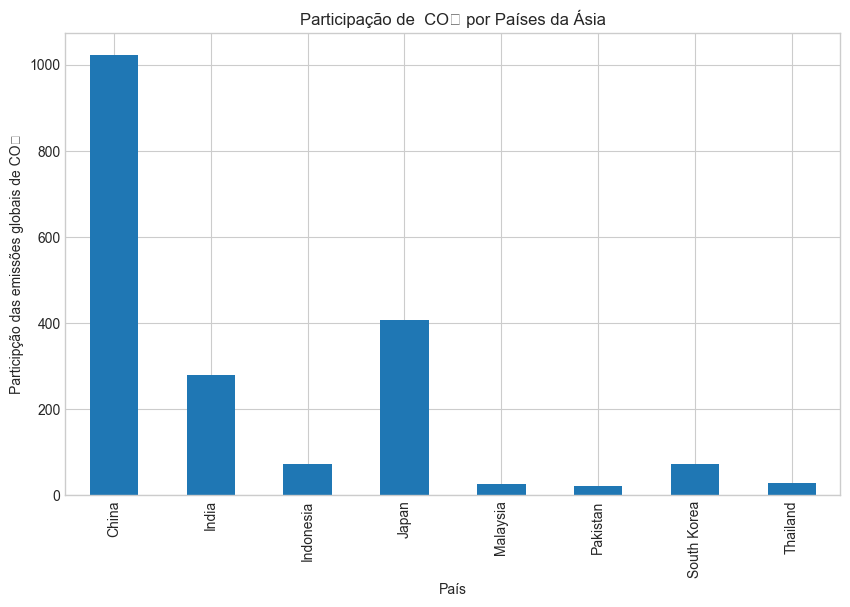

In [15]:
# Install missing packages
%pip install pandas matplotlib

import pandas as pd 
# Ler a base de dados
df_co2 = pd.read_csv("annual-share-of-co2-emissions.csv")

import matplotlib.pyplot as plt
# Filter data for South America and plot a bar chart for each country
south_america_countries = ['China','India','Japan','South Korea','Indonesia','tawain','Thailand','Malaysia','Pakistan']
south_america_data = df_co2[df_co2['Entity'].isin(south_america_countries)]

south_america_data.groupby('Entity')['Share of global annual CO₂ emissions'].sum().plot(kind='bar', figsize=(10, 6))
plt.xlabel('País')
plt.ylabel('Participção das emissões globais de CO₂')
plt.title('Participação de  CO₂ por Países da Ásia')
plt.show()

Note: you may need to restart the kernel to use updated packages.


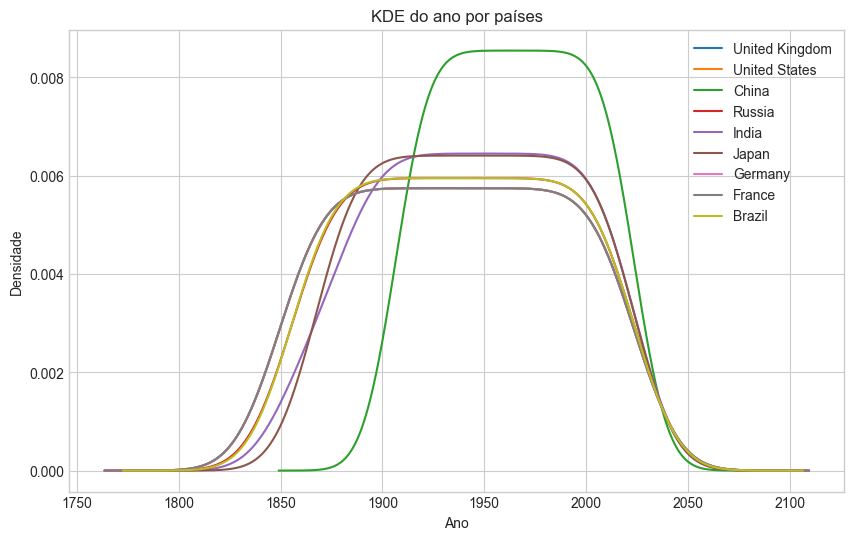

In [ ]:
%pip install scipy

selected_countries = ['United Kingdom', 'United States', 'China', 'Russia', 'India', 'Japan', 'Germany', 'France', 'Brazil']

selected_data = df_co2[df_co2['Entity'].isin(selected_countries)]

# Criar o gráfico KDE para cada país, pulando países sem dados

plt.figure(figsize=(10, 6))

for country in selected_countries:

    country_data = selected_data[selected_data['Entity'] == country]

    if not country_data.empty:

        country_data['Year'].plot.kde(label=country)


plt.xlabel('Ano')

plt.ylabel('Densidade')

plt.title('KDE do ano por países')

plt.legend()

plt.show()

C:\Users\fiore\AppData\Local\Temp\ipykernel_13624\2662995060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='Entity', y='Share of global annual CO₂ emissions', palette='pastel')


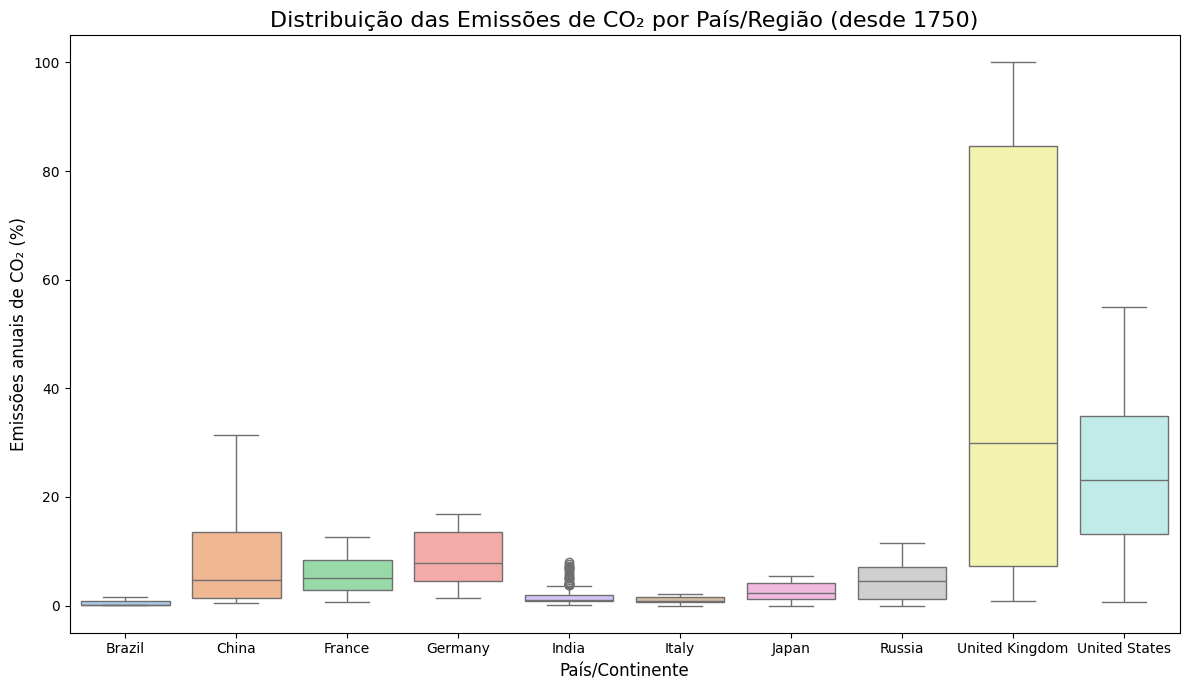

In [6]:

# Garantir que as bibliotecas estejam importadas
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra para um período mais recente para a análise não ser distorcida por zeros antigos
countries = ['United Kingdom', 'United States', 'China','Russia','India','Japan', 'Brazil', 'Germany', 'France', 'Italy']
df_recente = df_co2[df_co2['Year'] >= 1750]

# Filtrar apenas os países desejados
df_box = df_recente[df_recente['Entity'].isin(countries)]

plt.figure(figsize=(12, 7))
sns.boxplot(data=df_box, x='Entity', y='Share of global annual CO₂ emissions', palette='pastel')

plt.title('Distribuição das Emissões de CO₂ por País/Região (desde 1750)', fontsize=16)
plt.xlabel('País/Continente', fontsize=12)
plt.ylabel('Emissões anuais de CO₂ (%)', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\fiore\AppData\Local\Temp\ipykernel_13624\1133445333.py:113: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\fiore\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


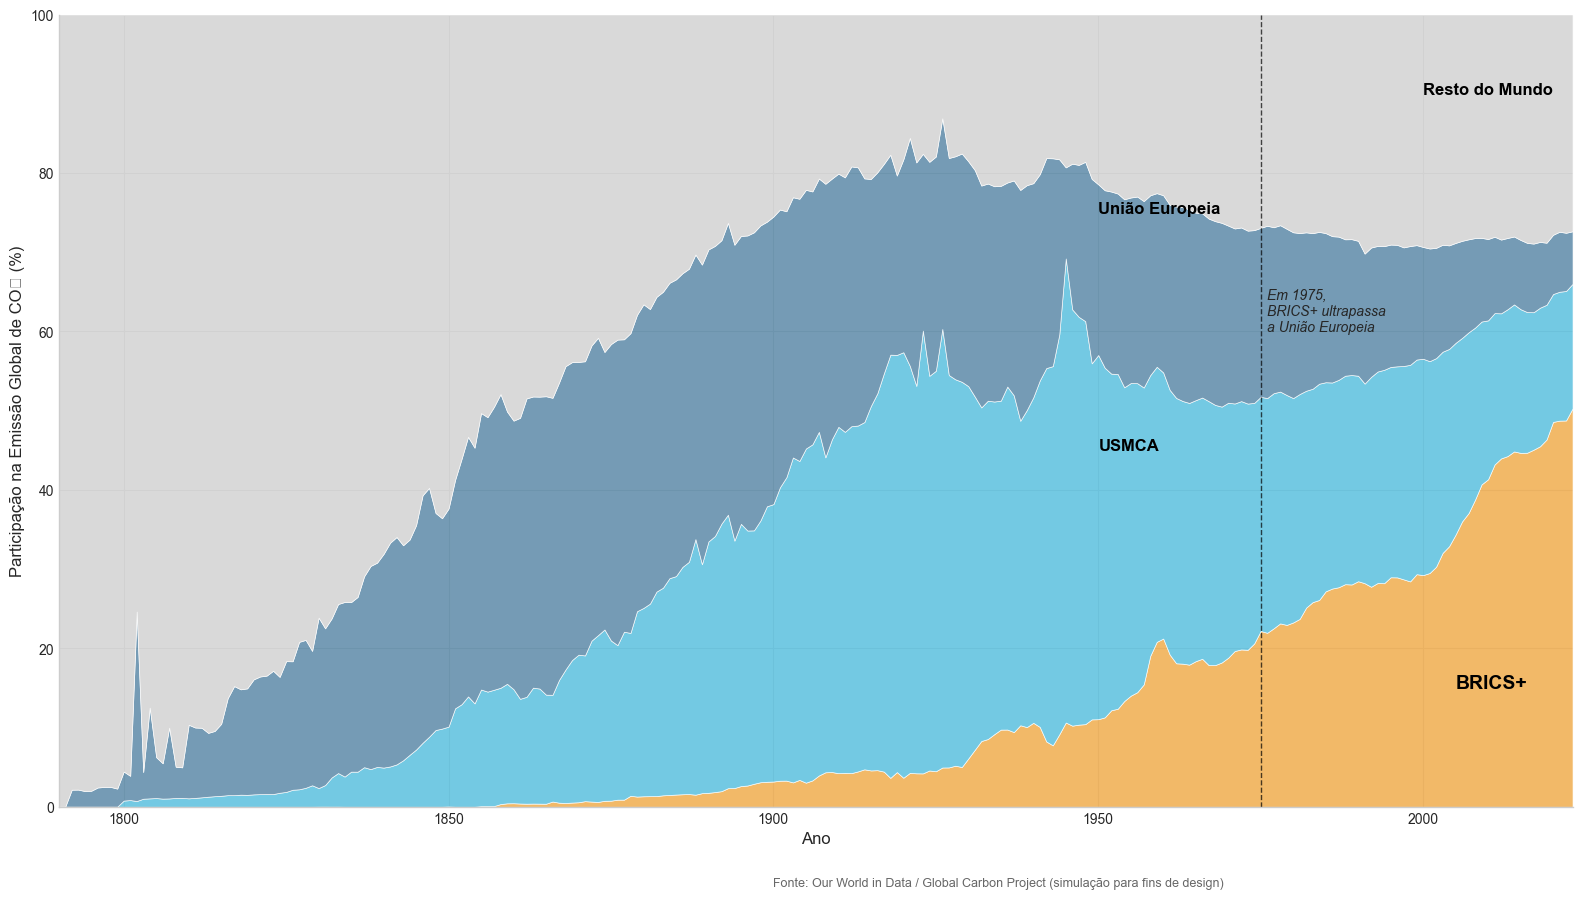

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_data = df_co2[df_co2['Entity'].isin(selected_countries)] 
df_recente = df_co2[df_co2['Year'] >= 1790]
# --- PASSO 2: Definir os Blocos ---
# Listas de países para cada bloco (baseado na composição atual)

# USMCA (substituiu o NAFTA)
usmca_countries = ['United States', 'Mexico', 'Canada']

# União Europeia (27 membros atuais)
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
    'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]

# BRICS - Vamos criar duas versões para uma análise mais rica:
# BRICS Original (até 2023)
brics_original_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
# BRICS+ (com a expansão de 2024)
brics_plus_countries = brics_original_countries + ['Egypt', 'Ethiopia', 'Iran', 'United Arab Emirates']
# Nota: A Arábia Saudita foi convidada mas ainda não formalizou.

# --- PASSO 3: Processar os Dados ---

# 1. Selecionar colunas relevantes e filtrar o período de análise
# Ajustar nomes das colunas para corresponder ao df_co2
df_filtered = df_co2[['Entity', 'Year', 'Share of global annual CO₂ emissions']].copy()
df_filtered = df_filtered[df_filtered['Year'] >= 1790] # Analisando a partir de 1790
# Renomear colunas para facilitar o uso posterior
df_filtered = df_filtered.rename(columns={
    'Entity': 'country',
    'Year': 'year',
    'Share of global annual CO₂ emissions': 'co2'
})

# 2. Criar uma função para atribuir cada país ao seu bloco
def assign_bloc(country):
    if country in usmca_countries:
        return 'USMCA'
    if country in eu_countries:
        return 'União Europeia'
    if country in brics_plus_countries:
        return 'BRICS+' # Usaremos a versão expandida para a análise principal
    # Se quiser comparar, pode adicionar a versão original:
    # if country in brics_original_countries:
    #     return 'BRICS (Original)'
    return 'Outros'

df_filtered['bloc'] = df_filtered['country'].apply(assign_bloc)

# 3. Calcular as emissões anuais totais por bloco
# Somamos as emissões de todos os países de cada bloco para cada ano.
bloc_emissions = df_filtered.groupby(['year', 'bloc'])['co2'].sum().reset_index()

# 4. Obter o total de emissões mundiais para cada ano
world_emissions = df_filtered[df_filtered['country'] == 'World'][['year', 'co2']].rename(columns={'co2': 'world_total_co2'})

# 5. Juntar os dados dos blocos com o total mundial
merged_df = pd.merge(bloc_emissions, world_emissions, on='year')

# 6. Calcular a porcentagem da emissão global para cada bloco
merged_df['percentage_of_world'] = (merged_df['co2'] / merged_df['world_total_co2']) * 100

# 7. Preparar os dados para o gráfico de área empilhada (pivotar a tabela)
# Queremos anos nas linhas e um coluna de porcentagem para cada bloco.
df_pivot = merged_df.pivot(index='year', columns='bloc', values='percentage_of_world').fillna(0)
# Vamos focar apenas nos blocos de interesse
df_plot = df_pivot[['USMCA', 'União Europeia', 'BRICS+']]
# Adiciona a coluna 'Resto do Mundo'
df_plot['Resto do Mundo'] = 100 - (df_plot['USMCA'] + df_plot['União Europeia'] + df_plot['BRICS+'])

# cores e ordem de empilhamento
labels = ['BRICS+', 'USMCA', 'União Europeia', 'Resto do Mundo']
cores = ['#f0ad4e', '#5bc0de', '#5d8aa8', '#d3d3d3'] # Laranja, Azul claro, Azul escuro, Cinza

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 9))

# Criar o gráfico de área com a nova ordem
ax.stackplot(df_plot.index, df_plot['BRICS+'], df_plot['USMCA'], df_plot['União Europeia'], df_plot['Resto do Mundo'],
             labels=labels, colors=cores, alpha=0.85, edgecolor='white', linewidth=0.5)

# Encontrar o ano da virada (exemplo)
ano_virada = df_plot[df_plot['BRICS+'] > df_plot['União Europeia']].index[0]
ax.axvline(x=ano_virada, color='black', linestyle='--', linewidth=1, alpha=0.7)
ax.text(ano_virada + 1, 60, f'Em {ano_virada},\nBRICS+ ultrapassa\na União Europeia', fontsize=10, style='italic')


# SUGESTÃO E: Rótulos diretos (em vez de legenda)
ax.text(2005, 15, 'BRICS+', fontsize=14, weight='bold', color='black')
ax.text(1950, 45, 'USMCA', fontsize=12, weight='bold', color='Black')
ax.text(1950, 75, 'União Europeia', fontsize=12, weight='bold', color='Black')
ax.text(2000, 90, 'Resto do Mundo', fontsize=12, weight='bold', color='black')

# --- 4. Refinamento estético ---
ax.set_ylabel("Participação na Emissão Global de CO₂ (%)", fontsize=12)
ax.set_xlabel("Ano", fontsize=12)
ax.set_xlim(1790, 2023)
ax.set_ylim(0, 100)

# Remover "poluição visual" (spines do topo e da direita)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adicionar fonte dos dados
ax.text(1900, -10, "Fonte: Our World in Data / Global Carbon Project (simulação para fins de design)", fontsize=9, alpha=0.7)

plt.tight_layout()
plt.show()